In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def getEdges(img):
    horizontalEdges = np.array([[-1,0,-1],[0,0,0],[1,0,1]])
    verticalEdges = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    horizontalEdgescards = np.zeros(img.shape)
    verticalEdgescards = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            horizontalEdgescards[i,j] = np.sum(img[i-1:i+2, j-1:j+2]*horizontalEdges)
            verticalEdgescards[i,j] = np.sum(img[i-1:i+2, j-1:j+2]*verticalEdges)

    edges = verticalEdgescards + horizontalEdgescards
    return edges

46 46 99 44
0 14 163 93
2


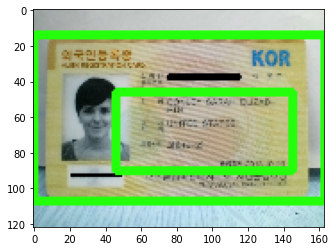

In [4]:
image = cv2.imread('UvlWm.jpg')

#percent by which the image is resized
scale_percent = 25

#calculate the 50 percent of original dimensions

width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)

# resize image
image = cv2.resize(image, (width,height))
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.equalizeHist(gray_img)
edges_detection = gray_img.copy()
edges_detection = cv2.GaussianBlur(edges_detection, (5,5), 0) 
edges = getEdges(edges_detection)
# gray_img = cv2.erode(gray_img, None, iterations=5)
# gray_img = cv2.dilate(gray_img, None, iterations=1)

thresh_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,51,9)

cnts = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
area_treshold = 1000
count = 0

for cnt in cnts:
    if cv2.contourArea(cnt) > area_treshold:
        x,y,w,h = cv2.boundingRect(cnt)
        print(x,y,w,h)
        count+=1
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)

print(count)
resize = image
plt.imshow(image)
# cv2.waitKey()

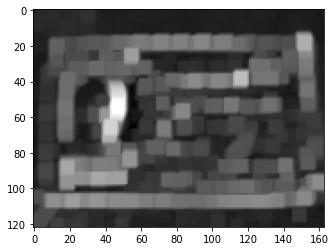

In [5]:
edges = cv2.dilate(edges, None, iterations=3)
# edges = cv2.erode(edges, None, iterations=3)
plt.imshow(edges,cmap=plt.get_cmap('gray'))


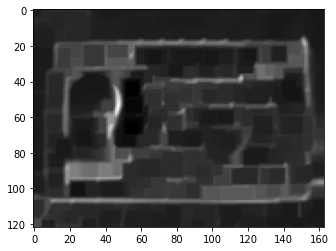

In [6]:
edges = cv2.erode(edges, None, iterations=3)
plt.imshow(edges,cmap=plt.get_cmap('gray'))

In [78]:
# gray_img = cv2.erode(gray_img, None, iterations=5)
# gray_img = cv2.dilate(gray_img, None, iterations=5)
# plt.imshow(gray_img,cmap=plt.get_cmap('gray'))

In [70]:
# edges = cv2.GaussianBlur(edges, (15,15), 0) 

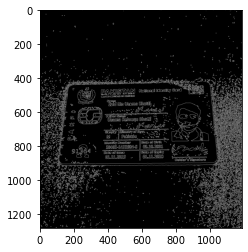

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('zaid.jpeg')
scale_percent = 100

#calculate the 50 percent of original dimensions

width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

# resize image
img = cv2.resize(img, (width,height))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resh_img = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,107,9)

gray = cv2.equalizeHist(gray)
gray = cv2.dilate(gray, None, iterations=1)
gray = cv2.erode(gray, None, iterations=1)
kernel = np.ones((7,7),np.float32)/49
gray = cv2.filter2D(gray,-1,kernel)
edges = cv2.Canny(resh_img,400,600,apertureSize = 5)
# manedges = getEdges(gray)
plt.imshow(edges,cmap=plt.get_cmap('gray'))


lines = cv2.HoughLines(edges,1,np.pi/180,15)
for i in range(8):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

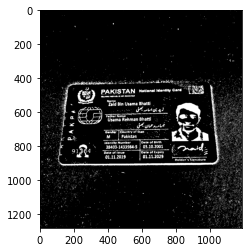

In [45]:
plt.imshow(resh_img,cmap=plt.get_cmap('gray'))

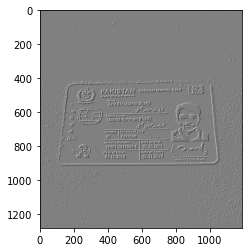

In [46]:
newedges = getEdges(resh_img)
# plt.imshow(newedges,cmap=plt.get_cmap('gray'))
contours = cv2.findContours(newedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
area_threshold = 1000
maxcnt = 0
for cnt in cnts:
    if cv2.contourArea(cnt) > area_threshold:

        x,y,w,h = cv2.boundingRect(cnt)
        if w != h and  w/h < 2 and h/w < 2:

        # if maxcnt < cv2.contourArea(cnt):
        #     maxcnt = cv2.contourArea(cnt)
        #     newcnt = cnt
                
            
        
            print(x,y,w,h)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)


In [56]:


cnt = sorted(cv2.findContours(newedges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)
segmented=cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


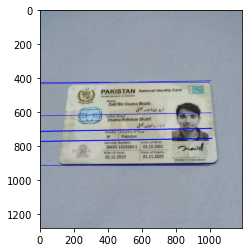

In [52]:
plt.imshow(img)